While researching decision trees, I happened upon a summary of the CART algorithm and was intrigued by the description of this recursive method. My understanding (and approach to making my decision tree) was focused on two major things. I wanted to use a weighted gini score - more specifically, the average of the Gini impurity of the children, weighted by their population - and a recursive, non-greedy approach. 

The method that was the hardest to figure out was how to compute the “best split” for each node in the tree. (“Best” meaning the average impurity of the two children, weighted by their population, is less than the impurity of the current node, and is the smallest score possible for the next step.) The goal was to recursively compute the weighted Gini of the two children all the way down the tree before locking in the top node decision, but I was never able to get that approach working correctly. 

My next idea was to avoid a quadratic runtime by iteratively looping through the sorted feature values as possible “thresholds” for a split (based on its gini score), while keeping track of the number of samples per class on the left and on the right and just incrementing/decrementing them by 1 after looking at each threshold. I compute the gini impurity of the split generated by that particular threshold, and return the one with the smallest impurity. This method is not recursive itself, but is called many times while recursively growing the tree. 


# Decision Tree

In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils import Bunch
import tree

class Decision_Tree:
    def __init__(self, max_depth=None):
        self.max_depth = DEPTH

    def fit(self, X, y):
        self.n_classes = 2
        self.n_features = X.shape[1]
        self.n_features = X.shape[1]
        self.tree = self.grow_tree(X, y)

    def predict_class(self, X): #general class prediction for whole list - calls single method below
        return [self.predict(inputs) for inputs in X]

    def predict(self, inputs): #predict class for one node
        node = self.tree
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

    def gini(self, y):  #compute gini impurity
        m = y.size
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes))

    def best_split(self, X, y): #find the best split, i.e. average weighted impurity is minimized as much as possible
        #Process:
        # 1. Iterate through the sorted feature values as possible thresholds
        # 2. Keep track of the number of samples per class on the left and on the right
        # 3. Increment/decrement them by 1 after each threshold.
        m = y.size
        if m <= 1: #need at least two elements to split
            return None, None

        #count up number in each class
        num_parent = [np.sum(y == c) for c in range(self.n_classes)]

        #compute gini score of current node
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None

        #walk through all features
        for idx in range(self.n_features):
            #sort values along current feature
            thresholds,classes = X[:, idx], y[:, 0]

            #compute iteratively
            num_left = [0] * self.n_classes
            num_right = num_parent.copy()
            for i in range(1, m):  # possible split positions
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes)
                )

                gini = (i * gini_left + (m - i) * gini_right) / m

                if thresholds[i] == thresholds[i - 1]: #don't want to split at identical values
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2  # midpoint
        return best_idx, best_thr

    def grow_tree(self, X, y, depth=0):
        count = 0
        while count <= N_FEATURES:
            count = count + 1
            #build decision tree by recursively finding the best split
            num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
            predicted_class = np.argmax(num_samples_per_class)
            node = tree.Tree_node(
                gini=self.gini(y),
                num_samples=y.size,
                num_samples_per_class=num_samples_per_class,
                predicted_class=predicted_class,
            )

            if depth < self.max_depth:
                index, threshold = self.best_split(X, y)
                if index is not None:
                    indices_left = X[:, index] < threshold
                    X_left, y_left = X[indices_left], y[indices_left]
                    X_right, y_right = X[~indices_left], y[~indices_left]
                    node.feature_index = index
                    node.threshold = threshold
                    node.left = self.grow_tree(X_left, y_left, depth + 1)
                    node.right = self.grow_tree(X_right, y_right, depth + 1)
            #print(node.feature_index )
            return node

    def printTree(self, feature_names, class_names, show_details=False):
        self.tree.print_tree(feature_names, class_names, show_details)
        
        
def test_accuracy(pred_score, predlabels):
    print(N_FEATURES, 'features')
    y_true = predlabels
    cm = confusion_matrix([1-x for x in y_true], [1-int(x > 0.5) for x in pred_score])
    print('Sensitivity: {}'.format(float(cm[0][0])/(cm[0][0]+cm[0][1])))
    print('Specificity: {}'.format(float(cm[1][1])/(cm[1][1]+cm[1][0])))
    recall = ((cm[0][0])/(cm[0][0]+cm[0][1]) + (cm[1][1])/(cm[1][1]+cm[1][0]))/2
    print('Recall: {}'.format(float(recall)))
    print('Confusion matrix:')
    print(cm)

In [15]:
DEPTH = 10
N_FEATURES = 5

attributes_train = ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7',
                    'question8', 'question9', 'question10', 'question11', 'question12', 'question13', 'question14',
                    'question15', 'question16', 'question17', 'question18', 'question19', 'question20',
                    'question21', 'question22', 'question23', 'question24', 'question25', 'question26',
                    'question27', 'question28', 'question29', 'question30', 'diag']
X_train_labels = ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7',
                    'question8', 'question9', 'question10', 'question11', 'question12', 'question13', 'question14',
                    'question15', 'question16', 'question17', 'question18', 'question19', 'question20',
                    'question21', 'question22', 'question23', 'question24', 'question25', 'question26',
                    'question27', 'question28', 'question29', 'question30']
y_train_labels = ['diag']

attributes_test = ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7',
                   'question8', 'question9', 'question10', 'question11', 'question12', 'question13', 'question14',
                   'question15', 'question16', 'question17', 'question18', 'question19', 'question20', 'question21',
                   'question22', 'question23', 'question24', 'question25', 'question26', 'question27', 'question28',
                   'question29', 'question30', 'ASD']
X_test_labels = ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7',
                   'question8', 'question9', 'question10', 'question11', 'question12', 'question13', 'question14',
                   'question15', 'question16', 'question17', 'question18', 'question19', 'question20', 'question21',
                   'question22', 'question23', 'question24', 'question25', 'question26', 'question27', 'question28',
                   'question29', 'question30']
y_test_labels = ['ASD']

train, test = pd.read_csv('primary_dataset.csv', usecols=attributes_train), pd.read_csv('validation_dataset.csv',usecols=attributes_test)

train_set = pd.DataFrame(train)
#print(train_set)
train_set = Bunch(
    data=train.loc[:, X_train_labels],
    target=train.loc[:, y_train_labels],
    feature_names = ["question {}".format(i) for i in range(1, 31)],
    target_names = ["diag {}".format(i) for i in range(0, 2)],
    hide_details=False
)

X_train, y_train = train_set.data.to_numpy(), train_set.target.to_numpy()
for i in range(len(y_train)):
    if y_train[i]=='asd':
        y_train[i] = 1
    else:
        y_train[i] = 0
# X_train = X_train.loc[:, X_train.columns != 'asd']
# y_train = pd.DataFrame(X_train.loc(X_train.columns == 'asd'))

X_test = pd.DataFrame(test)
X_test = Bunch(
    data=test.loc[:, X_test_labels],
    target=test.loc[:, y_test_labels]
)
X_test, y_test = X_test.data, X_test.target


clf = Decision_Tree(max_depth=10)
clf.fit(X_train, y_train)
#test_accuracy(list(clf.fit(X_train, y_train)), y_train)

#clf.printTree(
#    list(train_set.feature_names),
#    list(train_set.target_names),
#    not train_set.hide_details,
#)

# Random Forest

There are definitely bugs in the decision tree code, and the optimization I tried to write into it didn't lend itself well to being adapted to the random forest... so I essentially had to start from scratch with a simpler decision tree to use in the random forest. (I also moved away from trying to use Pandas dataframe stuff because trying to learn all their methods was really slowing me down.)

I also added k-folds cross validation so I could compare it to how the separate training and test sets perform. Since I never implemented the grouping/voting on child IDs in the dataset, and instead just treat each entry separately, k-folds seemed like an interesting compromise between the two approaches. 

In [17]:
from random import seed
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt

To find the best split point, I evaluate the cost of each value in the training dataset for each input variable. get_split takes a fixed number of input features from the dataset (chosen randomly and without replacement) to evaluate, only needing to look at each attribute once when looking for the split point with the lowest cost.
Two helper functions are used here: test_split is used to split the dataset at a possible split point, and gini_index is used to evaluate the cost of a given split by the group created. 

In essence: a list of features is made by randomly selecting indices (of features) and putting them in a list, which we then go through and evaluate as possible split points. 

In [18]:
# find the best split point
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    new_index, new_value, new_score, new_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0]) - 1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < new_score:
                new_index, new_value, new_score, new_groups = index, row[index], gini, groups
    return {'index': new_index, 'value': new_value, 'groups': new_groups}

# split the dataset based on attribute and attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# calculate the gini impurity
def gini_index(groups, classes):
    #count all samples at the split point
    n_instances = float(sum([len(group) for group in groups]))

    #sum the weighted gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # don't divide by 0
        if size == 0:
            continue
        score = 0.0
        # calculate the score for the group from the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the score by group size
        gini += (1.0 - score) * (size / n_instances)
    return gini

As I said, I used k-fold cross validation methods to look at some form of random grouping with my model. Obviously, this means I have to split the dataset into k folds and then evaluate across the k models. 
Otherwise, it doesn't vary much from the method evaluating with the separate training and test sets. 

In [22]:
# split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        split.append(fold)
    return split

# evaluate using the k-folds cross validation split
def evaluate_folds(dataset, n_folds, max_depth, min_size, sample_size, n_trees, n_features):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = random_forest(train_set, test_set, max_depth, min_size, sample_size, n_trees, n_features)
        actual = [row[-1] for row in fold]
        accuracy = get_accuracy(actual, predicted)
        scores.append(accuracy)
    return scores

# evaluate with separate training and test datasets instead of k-folds
# this currently requires test set and training set to be same size
def evaluate_separate(dataset, test_set, max_depth, min_size, sample_size, n_trees, n_features):
    scores = list()
    predicted = random_forest(dataset, test_set, max_depth, min_size, sample_size, n_trees, n_features)
    actual = [row[-1] for row in dataset]
    accuracy = get_accuracy(actual, predicted)
    scores.append(accuracy)
    return scores

I'm still trying to use something similar to the CART algorithm, but adapted for bagging. The methods to_leaf, split, and build_tree work together to create a single decision tree. This is still a "greedy" method, building the trees on asking the "best" questions (as informed by gini score) instead of completely random building of a tree.  
Predict makes a prediction on a single decision tree, subsample makes (obviously) a subsample of the training data, and bagging_predict makes a prediction on the whole group (list) of decision trees.  
Random_forest actually powers all of this: first creating a bunch of decision trees from the subsamples of the training data, and then uses that bunch to make the predictions. 

In [19]:
def to_leaf(group):
    leaves = [row[-1] for row in group]
    return max(set(leaves), key=leaves.count)


# create children splits for a node, or make leaf
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del (node['groups'])
    #check for no split
    if not left or not right:
        node['left'] = node['right'] = to_leaf(left + right)
        return

    #check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_leaf(left), to_leaf(right)
        return

    #do left child
    if len(left) <= min_size:
        node['left'] = to_leaf(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth + 1)

    #do right child
    if len(right) <= min_size:
        node['right'] = to_leaf(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth + 1)
        
        
# build a single decision tree
def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root


# make a prediction with a single decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


# create a random sample (with replacement)
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample


# make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)


# random forest - calls helper methods to actually build it
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return (predictions)

And of course, there is some work to do with converting the string classes to int, and calculating all the accuracy metrics when everything is done. 

In [20]:
def convert_class_to_int(dataset, column):
    for row in dataset:
        if row[column] == 'asd':
            row[column] = 1
        else:
            row[column] = 0
            

# calculate accuracy metrics
def get_accuracy(actual, predicted):
    confusion_matrix = a = [[0 for x in range(2)] for y in range(2)]
    correct = 0
    scores = list()
    for i in range(len(actual)):
        if actual[i] == 0:
            if predicted[i] == 0:
                confusion_matrix[0][0] = confusion_matrix[0][0] + 1
            if predicted[i] == 1:
                confusion_matrix[0][1] = confusion_matrix[0][1] + 1
        if actual[i] == 1:
            if predicted[i] == 0:
                confusion_matrix[1][0] = confusion_matrix[1][0] + 1
            if predicted[i] == 1:
                confusion_matrix[1][1] = confusion_matrix[1][1] + 1
        if actual[i] == predicted[i]:
            correct += 1
    sensitivity = float(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])) * 100
    specificity = float(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])) * 100
    accuracy = correct / float(len(actual)) * 100.0
    scores.append(sensitivity)
    scores.append(specificity)
    scores.append(accuracy)
    return scores

Putting it all together, here's results: 

Trees: 5

Features: 3
Mean Sensitivity: 75.812%
Mean Specificity: 91.368%
Mean Accuracy: 85.799%

Features: 4
Mean Sensitivity: 78.499%
Mean Specificity: 92.386%
Mean Accuracy: 87.377%

Features: 5
Mean Sensitivity: 78.420%
Mean Specificity: 88.505%
Mean Accuracy: 85.404%

Features: 6
Mean Sensitivity: 75.680%
Mean Specificity: 91.063%
Mean Accuracy: 85.799%

Features: 7
Mean Sensitivity: 79.220%
Mean Specificity: 91.684%
Mean Accuracy: 87.574%

Features: 8
Mean Sensitivity: 81.459%
Mean Specificity: 90.136%
Mean Accuracy: 86.982%

Features: 9
Mean Sensitivity: 78.362%
Mean Specificity: 90.197%
Mean Accuracy: 86.391%

Features: 10
Mean Sensitivity: 75.217%
Mean Specificity: 89.897%
Mean Accuracy: 85.010%



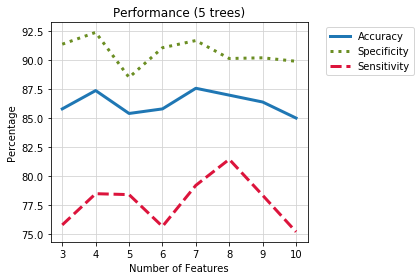

In [23]:
seed(5)
attributes_train = ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7',
                    'question8', 'question9', 'question10', 'question11', 'question12', 'question13', 'question14',
                    'question15', 'question16', 'question17', 'question18', 'question19', 'question20',
                    'question21', 'question22', 'question23', 'question24', 'question25', 'question26',
                    'question27', 'question28', 'question29', 'question30', 'diag']

attributes_test = ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7',
                   'question8', 'question9', 'question10', 'question11', 'question12', 'question13', 'question14',
                   'question15', 'question16', 'question17', 'question18', 'question19', 'question20', 'question21',
                   'question22', 'question23', 'question24', 'question25', 'question26', 'question27', 'question28',
                   'question29', 'question30', 'ASD']

train, test = pd.read_csv('primary_dataset.csv', usecols=attributes_train), pd.read_csv('validation_dataset.csv', usecols=attributes_test)
dataset = train.values.tolist()
test_set = test.values.tolist()

# convert class column to integers
convert_class_to_int(dataset, len(dataset[0]) - 1)

# evaluate algorithm
n_folds = 3
max_depth = 10
min_size = 1
sample_size = 1.0
n_trees = 5 #change here to run on 500 trees or whatever other number you want to try
mean_sensitivity = list()
mean_specificity = list()
mean_accuracy = list()
num_features = [3,4,5,6,7,8,9,10]

print('Trees: %d\n' % n_trees)
for n_features in num_features:
    scores = evaluate_folds(dataset, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    #scores = evaluate_separate(dataset, test_set, max_depth, min_size, sample_size, n_trees, n_features)
    sensitivity = list()
    specificity = list()
    accuracy = list()
    print('Features: %d' % n_features)
    for row in scores:
        sensitivity.append(row[0])
        specificity.append(row[1])
        accuracy.append(row[2])
    print('Mean Sensitivity: %.3f%%' % (sum(sensitivity) / float(len(sensitivity))))
    print('Mean Specificity: %.3f%%' % (sum(specificity) / float(len(specificity))))
    print('Mean Accuracy: %.3f%%\n' % (sum(accuracy) / float(len(accuracy))))
    mean_sensitivity.append((sum(sensitivity) / float(len(sensitivity))))
    mean_specificity.append(sum(specificity) / float(len(specificity)))
    mean_accuracy.append(sum(accuracy) / float(len(accuracy)))

plt.plot(num_features, mean_accuracy, linestyle='-', linewidth=3, color='tab:blue', label='Accuracy')
plt.plot(num_features, mean_specificity, linestyle=':', linewidth=3, color='olivedrab', label="Specificity")
plt.plot(num_features, mean_sensitivity, linestyle='--', linewidth=3, color='crimson', label="Sensitivity")
plt.xlabel("Number of Features")
plt.ylabel("Percentage")
plt.title("Performance (5 trees)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(color='lightgrey')
plt.tight_layout()
plt.show()

As we discussed in the last meeting, my specificity vs sensitivity numbers suggest that there is definitely some overfitting, probably due to the greedy building of the trees. 